In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info
#msft.info

# get historical market data
data = msft.history(period="max")

data = data.loc["2010-01-01":].copy()

In [3]:
hist = data.copy(deep=True)
hist["Tomorrow"] = hist["Close"].shift(-1)
hist["Target"] = (hist["Tomorrow"] > hist["Close"]).astype(int) 
#1 if followind day price incresed, 0 otherwise

horizons = [2,5,60,250,1000]

for horizon in horizons:
    rolling_averages = hist.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    hist[ratio_column] = hist["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    hist[trend_column] = hist.shift(1).rolling(horizon).sum()["Target"]
    
hist['SMA10'] = hist['Close'].rolling(10).mean()
hist['Dec_SMA10'] = (hist.SMA10 < hist.SMA10.shift(10)).astype(int);

hist['SMA30'] = hist['Close'].rolling(30).mean()
hist['Dec_SMA30'] = (hist.SMA30 < hist.SMA30.shift(30)).astype(int);

hist['SMA100'] = hist['Close'].rolling(100).mean()
hist['Dec_SMA100'] = (hist.SMA100 < hist.SMA100.shift(100)).astype(int);


In [4]:
try:
    del hist['Dividends']
    del hist['Stock Splits']
except:
    pass

In [5]:
hist.head(30)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,SMA10,Dec_SMA10,SMA30,Dec_SMA30,SMA100,Dec_SMA100
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00-05:00,23.321030,23.686611,23.298180,23.572367,38409100,23.579979,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2010-01-05 00:00:00-05:00,23.496201,23.686608,23.336258,23.579979,49749600,23.435270,0,1.000161,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2010-01-06 00:00:00-05:00,23.519048,23.671374,23.244864,23.435270,58182400,23.191553,0,0.996922,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2010-01-07 00:00:00-05:00,23.328645,23.381960,22.993530,23.191553,50559700,23.351494,1,0.994773,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2010-01-08 00:00:00-05:00,23.062076,23.519051,23.031610,23.351494,51197400,23.054464,0,1.003436,1.0,0.996814,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2010-01-11 00:00:00-05:00,23.389579,23.427662,22.940221,23.054464,68754700,22.902134,0,0.993599,1.0,0.988505,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2010-01-12 00:00:00-05:00,22.963064,23.153471,22.780274,22.902134,65912100,23.115393,1,0.996685,0.0,0.987715,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2010-01-13 00:00:00-05:00,23.046846,23.244869,22.856439,23.115393,51863500,23.579979,1,1.004634,1.0,0.999671,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2010-01-14 00:00:00-05:00,23.084922,23.686608,23.046841,23.579979,63228100,23.503822,0,1.009949,2.0,1.016348,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0


Lets add RSI (relative Strength index as a param)

In [6]:
from typing import Callable
# Define function to calculate the RSI
def calc_rsi(over: pd.Series, fn_roll: Callable) -> pd.Series:
    # Get the difference in price from previous step
    delta = over.diff()
    # Get rid of the first row, which is NaN since it did not have a previous row to calculate the differences
    delta = delta[1:] 

    # Make the positive gains (up) and negative gains (down) Series
    up, down = delta.clip(lower=0), delta.clip(upper=0).abs()

    roll_up, roll_down = fn_roll(up), fn_roll(down)
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))

    # Avoid division-by-zero if `roll_down` is zero
    # This prevents inf and/or nan values.
    rsi[:] = np.select([roll_down == 0, roll_up == 0, True], [100, 0, rsi])
    rsi.name = 'rsi'

    # Assert range
    valid_rsi = rsi[length - 1:]
    assert ((0 <= valid_rsi) & (valid_rsi <= 100)).all()
    # Note: rsi[:length - 1] is excluded from above assertion because it is NaN for SMA.

    return rsi

In [7]:
# Window length for moving average
lengths = [10,30]
# Calculate RSI using MA of choice
for length in lengths:
    # Reminder: Provide ≥ `1 + length` extra data points!
    hist['rsi_ema_'+str(length)] = calc_rsi(hist['Close'], lambda s: s.ewm(span=length).mean())
    hist['rsi_sma_'+str(length)] = calc_rsi(hist['Close'], lambda s: s.rolling(length).mean())
    hist['rsi_rma_'+str(length)] = calc_rsi(hist['Close'], lambda s: s.ewm(alpha=1 / length).mean())  

In [8]:
hist = hist.dropna()
hist.head(30)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,SMA30,Dec_SMA30,SMA100,Dec_SMA100,rsi_ema_10,rsi_sma_10,rsi_rma_10,rsi_ema_30,rsi_sma_30,rsi_rma_30
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-23 00:00:00-05:00,31.124766,31.192409,30.904921,30.964109,25128700,31.353065,1,0.997548,1.0,1.001805,...,31.681076,0,29.176986,0,40.046590,21.832984,42.347371,46.602305,45.932433,51.995354
2013-12-24 00:00:00-05:00,31.048666,31.429162,30.981021,31.353065,14243000,31.657471,1,1.006242,1.0,1.011291,...,31.674676,0,29.224772,0,53.790109,35.574212,49.415285,50.785483,48.971123,53.932970
2013-12-26 00:00:00-05:00,31.454540,31.699751,31.429171,31.657471,17612800,31.530638,0,1.004831,2.0,1.016342,...,31.684857,0,29.277186,0,62.100465,47.521957,54.288410,53.812556,51.617330,55.390725
2013-12-27 00:00:00-05:00,31.775849,31.809668,31.429169,31.530638,14563000,31.530638,0,0.997993,1.0,1.006586,...,31.668431,0,29.329331,0,56.890281,51.097460,51.970571,52.377663,47.230881,54.645391
2013-12-30 00:00:00-05:00,31.471449,31.606738,31.200873,31.530638,16290500,31.632095,1,1.000000,0.0,1.003931,...,31.655922,0,29.377477,0,56.890281,61.278128,51.970571,52.377663,47.862963,54.645391
2013-12-31 00:00:00-05:00,31.623641,31.775841,31.471442,31.632095,17503500,31.420704,0,1.001606,1.0,1.002895,...,31.651830,0,29.419720,0,60.818470,60.077359,53.913759,53.510763,49.296899,55.161879
2014-01-02 00:00:00-05:00,31.581358,31.623638,31.369970,31.420704,30632200,31.209322,0,0.996647,1.0,0.995766,...,31.658594,0,29.461433,0,49.363882,63.007789,49.296504,50.817744,51.207172,53.840361
2014-01-03 00:00:00-05:00,31.454533,31.471444,30.947200,31.209322,31134800,30.549795,0,0.996625,0.0,0.991884,...,31.663385,0,29.499615,0,40.127245,56.226315,45.013352,48.223555,50.849148,52.538351
2014-01-06 00:00:00-05:00,31.158590,31.192413,30.532884,30.549795,43603700,30.786537,1,0.989321,0.0,0.977015,...,31.636610,0,29.534643,0,23.417722,48.064546,34.593454,41.207530,45.454571,48.734443


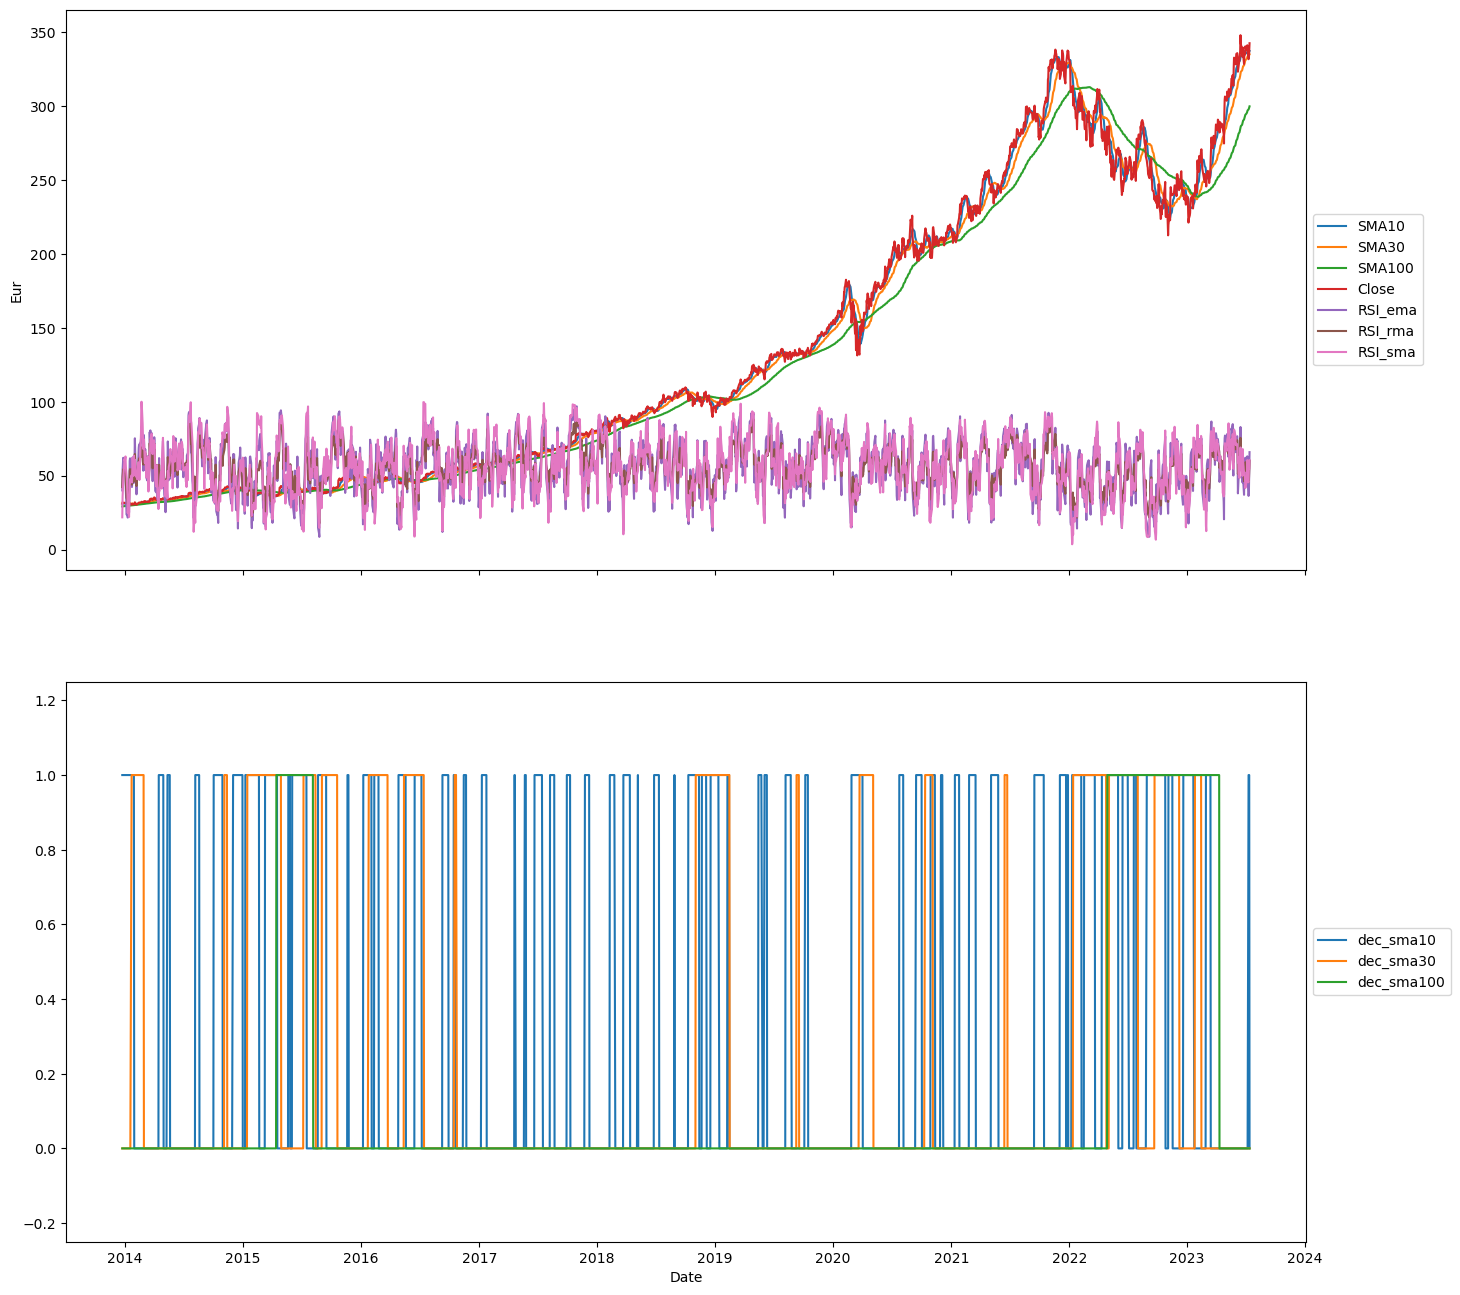

In [9]:
import matplotlib.pyplot as plt
hist.dropna(inplace=True)

fig, ax = plt.subplots(2,1, sharex= True,figsize=(16,16))
ax[0].plot(hist['SMA10'], label = 'SMA10')
ax[0].plot(hist['SMA30'], label = 'SMA30')
ax[0].plot(hist['SMA100'], label = 'SMA100')
ax[0].plot(hist['Close'], label = 'Close')

ax[0].plot(hist['rsi_ema_10'], label = 'RSI_ema')
ax[0].plot(hist['rsi_rma_10'], label = 'RSI_rma')
ax[0].plot(hist['rsi_sma_10'], label = 'RSI_sma')

ax[1].plot(hist['Dec_SMA10'], label = 'dec_sma10')
ax[1].plot(hist['Dec_SMA30'], label = 'dec_sma30')
ax[1].plot(hist['Dec_SMA100'], label = 'dec_sma100')

ax[0].set_ylabel('Eur')
ax[1].set_xlabel('Date')
# Put a legend to the right of the current axis
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylim([-0.25,1.25])

plt.show()

Define sliding window to consider history as a parameter

In [10]:
def SlidingWindow(in_df, window_size, period_shift = 1):
    """ We just put <window size> amount of data into singular row"""
    #window_size determines how many data points in the past we are interested
    column_names = [(x+'_'+str(y+1)) for y in range(0,window_size) for x in in_df.columns]
    column_names.extend(['next_day_Close', 'next_day_Change'])
    df = pd.DataFrame(columns = column_names)
    for row_i in range(0,in_df.shape[0]-window_size+1, period_shift):
        window_data = []
        for i in range(window_size):
            window_data.extend(in_df.iloc[row_i+i].values)
        try:    
            window_data.append(in_df.iloc[row_i+i+1]['Close'])
            window_data.append(in_df.iloc[row_i+i+1]['Target'])
        except IndexError:
            window_data.append(None)
            window_data.append(None)

        df.loc[in_df.index[row_i]] = window_data
    return df

In [11]:
df = hist.copy(deep=True)
principal_predictors = df.columns
history = 5 #how many previosu data points will be used for prediction
df = SlidingWindow(df, history)
df.dropna(inplace=True)

In [12]:
print(principal_predictors)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'SMA10', 'Dec_SMA10', 'SMA30',
       'Dec_SMA30', 'SMA100', 'Dec_SMA100', 'rsi_ema_10', 'rsi_sma_10',
       'rsi_rma_10', 'rsi_ema_30', 'rsi_sma_30', 'rsi_rma_30'],
      dtype='object')


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:
def predict(train, test, predictors, target, model, threshold = 0.5):
    model.fit(train[predictors], train[target])
    preds = model.predict_proba(test[predictors])[:,1] 
    preds[preds >=threshold] = 1
    preds[preds <threshold] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test[target], preds], axis = 1)
    return combined

Lets try to use Forward Feature Selection. Features are introduced at each iteration to enhance the model's functionality. The functionalities are maintained if performance is increased. Features that do not enhance the outcomes are removed.

In [37]:
#Lets see if we can predict whether tomorrow closing price will be higher (1) or lower(0) than previous day
from sklearn.metrics import precision_score

target = 'next_day_Change'
pred_score = 0
used_predictors = []

q80 = int(df.shape[0]*0.8) 
train = df.iloc[:q80]
test = df.iloc[q80:]

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

for predictor in principal_predictors:
    #we use all window width predictors (same as history count)
    window_predictors = [predictor+'_'+str(i+1) for i in range(history)]
    temp_predictors = used_predictors + window_predictors
    model_out = predict(train, test, temp_predictors, target, model)
    
    current_score = precision_score(model_out["next_day_Change"], model_out["Predictions"])
    if current_score > pred_score:
        used_predictors = used_predictors + window_predictors
        pred_score = current_score

print(f'Precision score: {pred_score} \nwith predictors: {used_predictors}')

Precision score: 0.5327510917030568 
with predictors: ['Open_1', 'Open_2', 'Open_3', 'Open_4', 'Open_5', 'High_1', 'High_2', 'High_3', 'High_4', 'High_5', 'Close_Ratio_2_1', 'Close_Ratio_2_2', 'Close_Ratio_2_3', 'Close_Ratio_2_4', 'Close_Ratio_2_5', 'SMA30_1', 'SMA30_2', 'SMA30_3', 'SMA30_4', 'SMA30_5']


So the prediction at the best score:

In [38]:
model_out = predict(train, test, used_predictors, target, model)

In [39]:
model_out

,next_day_Change,Predictions
2021-08-09 00:00:00-04:00,0.0,0.0
2021-08-10 00:00:00-04:00,0.0,0.0
2021-08-11 00:00:00-04:00,1.0,0.0
2021-08-12 00:00:00-04:00,1.0,1.0
2021-08-13 00:00:00-04:00,1.0,0.0
...,...,...
2023-06-29 00:00:00-04:00,0.0,1.0
2023-06-30 00:00:00-04:00,1.0,0.0
2023-07-03 00:00:00-04:00,1.0,1.0
2023-07-05 00:00:00-04:00,1.0,0.0


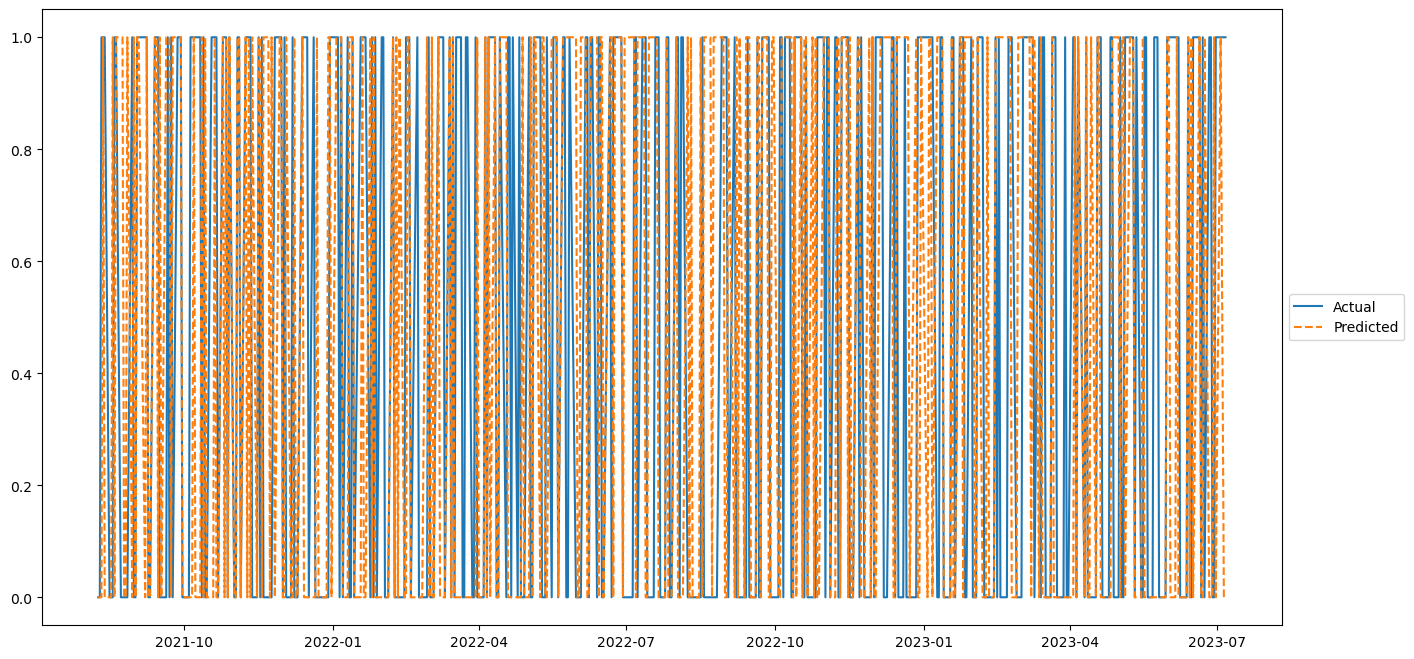

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(model_out[target], label='Actual')
ax.plot(model_out['Predictions'], linestyle ='dashed',label='Predicted')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [41]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(model_out["next_day_Change"], model_out["Predictions"])
print(cf_matrix)

[[137 107]
 [114 122]]


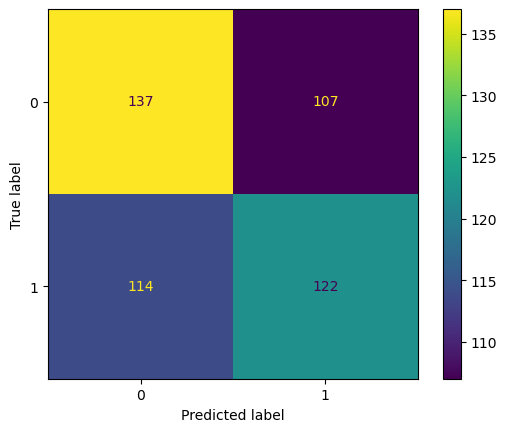

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()

In [43]:
model_out[target].value_counts() / model_out.shape[0]

0.0    0.508333
1.0    0.491667
Name: next_day_Change, dtype: float64

Lets try to find best predictors when doing the backtest

In [44]:
def backtest(data, model, predictors, taget, start=1000, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors,target, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [45]:
#Lets see if we can predict whether tomorrow closing price will be higher (1) or lower(0) than previous day
from sklearn.metrics import precision_score

target = 'next_day_Change'
pred_score = 0
bck_used_predictors = []

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

for predictor in principal_predictors:
    #we use all window width predictors (same as history count)
    window_predictors = [predictor+'_'+str(i+1) for i in range(history)]
    temp_predictors = bck_used_predictors + window_predictors
    predictions = backtest(df, model, temp_predictors, target)
    
    current_score = precision_score(predictions["next_day_Change"], predictions["Predictions"])
    if current_score > pred_score:
        bck_used_predictors = bck_used_predictors + window_predictors
        pred_score = current_score

print(f'Precision score: {pred_score} \nwith predictors: {used_predictors}')

Precision score: 0.5487646293888166 
with predictors: ['Open_1', 'Open_2', 'Open_3', 'Open_4', 'Open_5', 'High_1', 'High_2', 'High_3', 'High_4', 'High_5', 'Close_Ratio_2_1', 'Close_Ratio_2_2', 'Close_Ratio_2_3', 'Close_Ratio_2_4', 'Close_Ratio_2_5', 'SMA30_1', 'SMA30_2', 'SMA30_3', 'SMA30_4', 'SMA30_5']


In [46]:
q80 = int(df.shape[0]*0.8) 
train = df.iloc[:q80]
test = df.iloc[q80:]

model_out = predict(train, test, used_predictors, target, model)

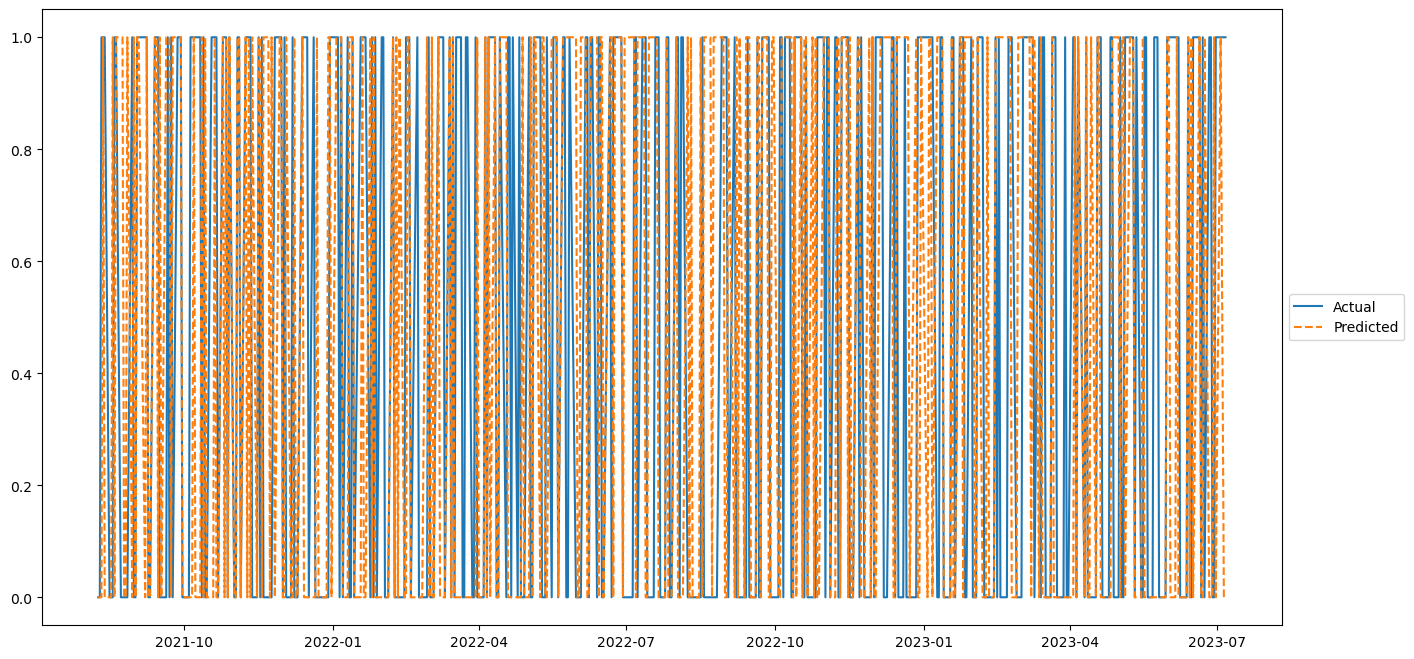

In [48]:
fig, ax = plt.subplots(figsize= (16,8))
ax.plot(model_out[target], label='Actual')
ax.plot(model_out['Predictions'], linestyle ='dashed',label='Predicted')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [49]:
model_out["Predictions"].value_counts()

0.0    251
1.0    229
Name: Predictions, dtype: int64

In [50]:
precision_score(model_out["next_day_Change"], model_out["Predictions"])

0.5327510917030568

In [51]:
predictions["next_day_Change"].value_counts() / predictions.shape[0]

1.0    0.537527
0.0    0.462473
Name: next_day_Change, dtype: float64

In [52]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(predictions["next_day_Change"], predictions["Predictions"])
print(cf_matrix)

[[258 389]
 [303 449]]


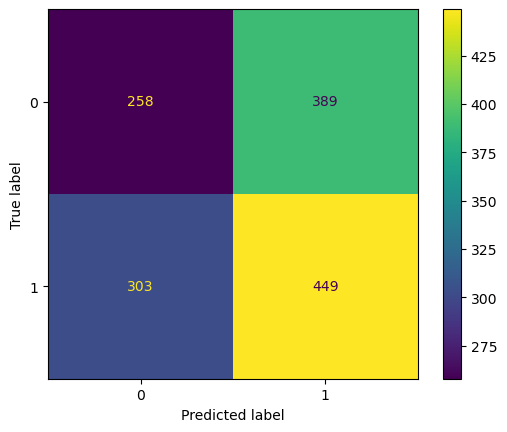

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()

#lets try NN

In [ ]:
#df[['Close_1','Close_2', 'Close_3', 'Close_4', 'Close_5', 'next_day_Close']].head()
df[['Target_1','Target_2', 'Target_3', 'Target_4', 'Target_5', 'next_day_Change']].head()

In [ ]:
principal_predictors

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow as tf

predictors = [(x+'_'+str(y+1)) for y in range(0,history) for x in principal_predictors]

nr_inputs = len(predictors)
model = Sequential([layers.Input((nr_inputs, 1)),
                    layers.Dense(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(loss = loss_fn, #tf.keras.losses.BinaryCrossentropy(),
#we use Binary as loss function,because we are working with 2 classes
                optimizer = tf.keras.optimizers.SGD(), 
#SGD stands for Stochastic Gradient Descent
                metrics = ['accuracy'])

lets normalise the data (mean normalisation)

In [ ]:
#normalized_df=(df-df.mean())/df.std()

In [ ]:
#Lets see if we can predict whether tomorrow closing price will be higher (1) or lower(0) than previous day
from sklearn.metrics import precision_score

target = 'next_day_Change'
pred_score = 0
used_predictors = []

in_df = df #normalized_df

q80 = int(in_df.shape[0]*0.8) 
q90 = int(in_df.shape[0]*0.9) 
train = in_df.iloc[:q80]
val = in_df.iloc[q80:q90]
test = in_df.iloc[q90:]

model.fit(train[predictors], train[target], validation_data=(val[predictors], val[target]), epochs=50)

In [ ]:
train_predictions = model.predict(train[predictors]).flatten()

In [ ]:
print(len(np.array(train[target])))
print(len(train_predictions))

In [ ]:
train_predictions

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(train_predictions)
ax.plot(np.array(train[target]))
plt.legend(['Training Predictions', 'Training Observations'])